# Fashion MNIST test

according to [course](https://www.coursera.org/learn/introduction-tensorflow/supplement/XFWSt/get-hands-on-with-computer-vision-lab-1)

Computer vision neural network with minimal one hidden layer

In [ ]:
import pandas as pd

import tensorflow as tf

In [ ]:
print(tf.__version__)

2.9.2


we use fashion mnist dataset provided by tensorflow

In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
print(training_images[0].shape)
print(training_images.shape)

(28, 28)
(60000, 28, 28)


In [ ]:
print(test_images.shape)

(10000, 28, 28)


In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

## about softmax

this code shows how the softmax works. It would compute 'probability' of an array elements according to its values. The sum of all output of the softmax funcion would equal to 1 

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
print(outputs.numpy().sum())

1.0


## build the classification model

we build the neural network model using 1 hidden layer with 128 nodes.

The network will be feed with matrix of images and the labels for those images as a training dataset

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

### compile and trainig the networks

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4976 - accuracy: 0.8256
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3720 - accuracy: 0.8652
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3360 - accuracy: 0.8783
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3100 - accuracy: 0.8868
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2944 - accuracy: 0.8918
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - accuracy: 0.8961
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2675 - accuracy: 0.9003
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9047
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2482 - accuracy: 0.9071
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.238

In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3922 - accuracy: 0.8841


[0.39218512177467346, 0.8841000199317932]

## Excercise:

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])
print(np.sum(classifications[0]))
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
[6.38350173e-08 2.31517957e-13 1.31412725e-09 1.57249604e-12
 1.22856655e-11 1.38703044e-07 8.55616522e-10 3.93531471e-03
 1.76142781e-12 9.96064484e-01]
1.0
9


### Plot history of training process

We can plot the loss value of each epoch during training process


In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

history = model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4819
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3623
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3252
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2984
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[3.7840582e-06 4.9922687e-07 1.1246948e-06 3.0566366e-06 2.7443709e-06
 7.4972864e-04 9.3682784e-06 2.0419892e-02 5.0598811e-07 9.7880924e-01]
9


In [ ]:
print(history.history.keys())

dict_keys(['loss'])


In [ ]:
import matplotlib.pyplot as plt


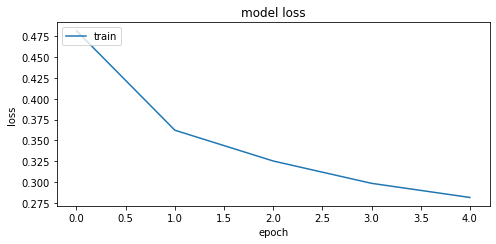

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### using validation data

normaly we would split dataset into three parts:

 - Training dataset
 - Validation dataset
 - Test dataset

Here for practical purpose and conciseness we also use test dataset as a validation dataset  

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

history = model.fit(training_images, training_labels, epochs=5, verbose=0,
                    validation_data=(test_images, test_labels) )

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 3ms/step
[1.4524119e-06 1.9459314e-09 7.0142853e-08 1.1976704e-08 1.0634194e-06
 6.0361633e-03 1.7093485e-06 1.6509503e-01 2.4800884e-06 8.2886201e-01]
9


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


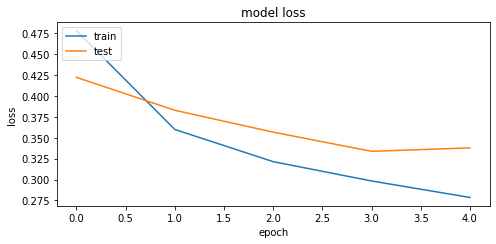

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## adding metrics

Using accuracy as a metric

In [ ]:
from tensorflow import keras

fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(training_images, training_labels, epochs=5, verbose=0,
                    validation_data=(test_images, test_labels) )

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

print(history.history.keys())

313/313 [==============================] - 1s 3ms/step
[2.4807039e-06 6.1524821e-07 1.9311322e-08 8.2981948e-08 6.6146860e-08
 6.0286084e-03 9.1413119e-07 1.4076520e-02 1.4884067e-07 9.7989058e-01]
9
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


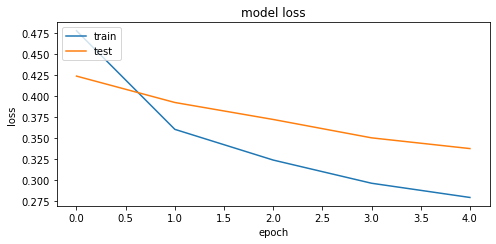

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



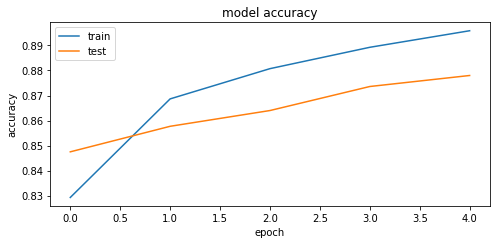

In [ ]:
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Increasing hidden neuron to 1024

313/313 [==============================] - 1s 3ms/step
[5.3128105e-07 9.5520116e-09 1.1697382e-09 1.6604669e-09 8.8214032e-09
 1.1356978e-02 2.8960301e-07 2.2095032e-02 1.3369901e-06 9.6654576e-01]
9
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


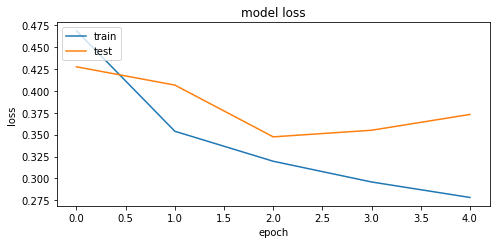

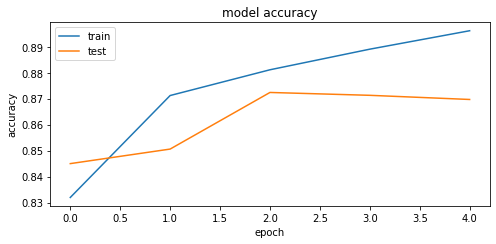

In [ ]:
from tensorflow import keras

fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(training_images, training_labels, epochs=5, verbose=0,
                    validation_data=(test_images, test_labels) )

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


adding node does not always improve network performance

## adding one more hidden layer

313/313 [==============================] - 1s 3ms/step
[5.2026337e-07 7.3112592e-06 6.9776399e-07 2.2652227e-06 1.8483661e-06
 3.0179346e-02 9.4271836e-06 1.8902557e-02 1.1813403e-07 9.5089597e-01]
9
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


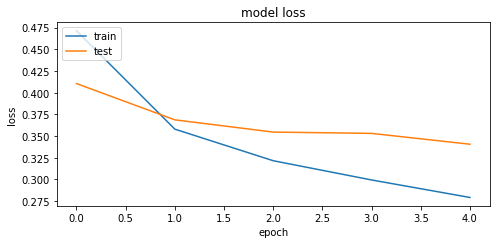

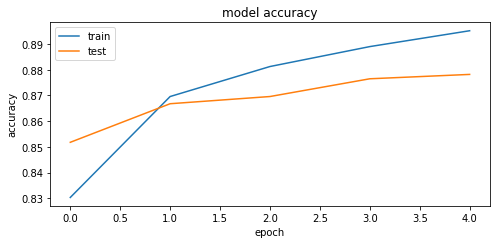

In [ ]:
from tensorflow import keras

fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(training_images, training_labels, epochs=5, verbose=0,
                    validation_data=(test_images, test_labels) )

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Adding more hidden layer does not have a significant impact on classification performance to a simple problem set like fashion mnist, but if the data dimension getting more complex then there is a possibility that adding more layer will give some improvement.

penambahan hidden layer tidak punya significant impact karena problem setnya masih sederhana, namun jika dimensi data bertambah, seperti misal ada warna rgb, maka tambahan hidden layer bisa jadi berpengaruh terhadap hasil

## Adding epoch

313/313 [==============================] - 1s 3ms/step
[4.9419274e-08 7.5954364e-12 6.0075867e-10 3.7501942e-12 1.6226174e-13
 1.2823154e-05 6.5151062e-10 6.0618296e-04 5.1730416e-07 9.9938053e-01]
9
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


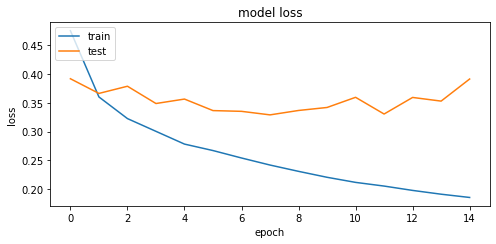

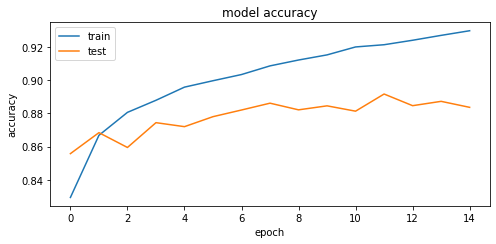

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(training_images, training_labels, epochs=15, verbose=0,
                    validation_data=(test_images, test_labels) )

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Callbacks

Callback to limit runing epochs after requirment has been met, in this case below is when accuracy reach some threshold


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_sparse_categorical_accuracy') >= 0.889): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()



Reached 60% accuracy so cancelling training!
313/313 [==============================] - 1s 3ms/step
[4.4837748e-08 6.2188747e-08 7.7884456e-11 5.8844982e-12 6.6947281e-10
 2.1015005e-03 6.5034478e-10 8.6848382e-03 3.7801833e-09 9.8921359e-01]
9
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


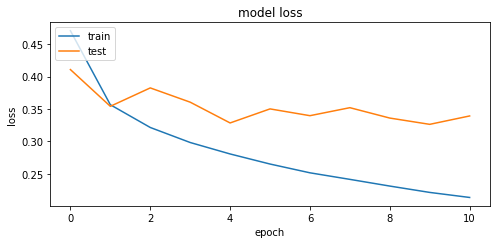

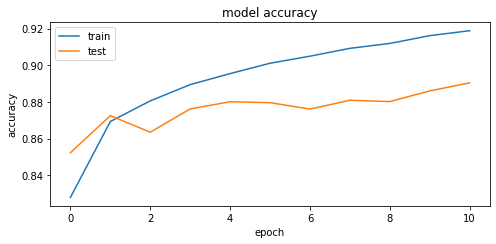

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(training_images, training_labels, epochs=15, verbose=0,
                    validation_data=(test_images, test_labels), callbacks=[callbacks])

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()